In [5]:
# Question 1 
# K-Fold Cross Validation (K-NN)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

def k_fold_cv(X, y, k=5, n_neighbors=3):
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.vstack((X[:start], X[end:]))
        y_train = np.hstack((y[:start], y[end:]))

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)

    return np.mean(accuracies)

# Run k-Fold Cross Validation
average_accuracy = k_fold_cv(X, y, k=5)
print("Average k-NN Accuracy:", average_accuracy)


Average k-NN Accuracy: 0.9066666666666666


In [15]:
# Question - 2 
# Bootstrap Sampling (Linear Regression)

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

# Load dataset
iris = load_iris()
X = iris.data

# Prepare regression data
X_reg = X[:, :2]     # First two features
y_reg = X[:, 2]      # Third feature

def bootstrap_regression(X, y, n_bootstraps=500):
    n_samples = len(X)
    coefficients = []

    for _ in range(n_bootstraps):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        X_boot = X[indices]
        y_boot = y[indices]

        model = LinearRegression()
        model.fit(X_boot, y_boot)

        coefficients.append(model.coef_)

    return np.array(coefficients)

# Run Bootstrap
coefs = bootstrap_regression(X_reg, y_reg)

print("Shape of coefficients array:", coefs.shape)


Shape of coefficients array: (500, 2)


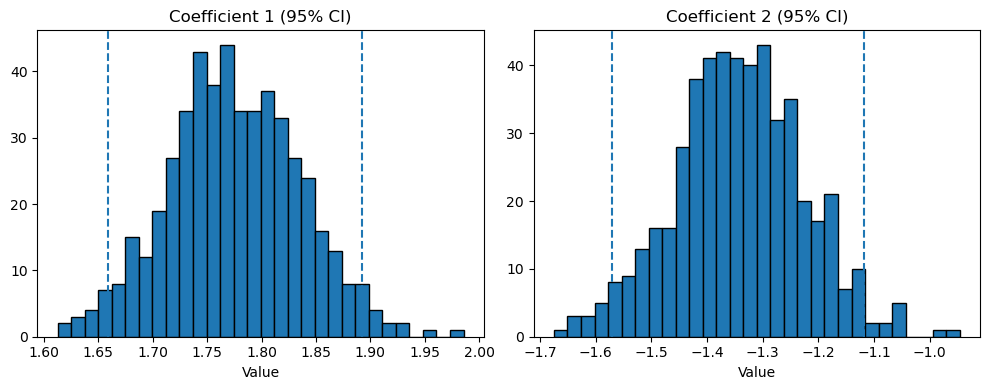

95% Confidence Intervals:
Coefficient 1: [1.659, 1.892]
Coefficient 2: [-1.571, -1.118]


In [16]:
# Confidence Interval Plot (Bootstrap Results)

import numpy as np
import matplotlib.pyplot as plt

# Assume coefs is already generated
# coefs shape → (n_bootstraps, n_features)

plt.figure(figsize=(10, 4))

# Coefficient 1
plt.subplot(1, 2, 1)
plt.hist(coefs[:, 0], bins=30, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 0], 2.5), linestyle='--')
plt.axvline(np.percentile(coefs[:, 0], 97.5), linestyle='--')
plt.title("Coefficient 1 (95% CI)")
plt.xlabel("Value")

# Coefficient 2
plt.subplot(1, 2, 2)
plt.hist(coefs[:, 1], bins=30, edgecolor='black')
plt.axvline(np.percentile(coefs[:, 1], 2.5), linestyle='--')
plt.axvline(np.percentile(coefs[:, 1], 97.5), linestyle='--')
plt.title("Coefficient 2 (95% CI)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()

# Print Confidence Intervals
print("95% Confidence Intervals:")
for i in range(coefs.shape[1]):
    lower = np.percentile(coefs[:, i], 2.5)
    upper = np.percentile(coefs[:, i], 97.5)
    print(f"Coefficient {i+1}: [{lower:.3f}, {upper:.3f}]")


In [27]:
# Question 1 
# K-Fold Cross Validation (K-NN)
# Printing Each fold wise Accuracy 

import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

def k_fold_cv(X, y, k=5, n_neighbors=3):
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.vstack((X[:start], X[end:]))
        y_train = np.hstack((y[:start], y[end:]))

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)

        print(f"Fold {i+1} Accuracy: {acc:.3f}")

    return np.mean(accuracies)

# Run k-Fold Cross Validation
average_accuracy = k_fold_cv(X, y, k=5)
print("Average k-NN Accuracy:", average_accuracy)


Fold 1 Accuracy: 1.000
Fold 2 Accuracy: 1.000
Fold 3 Accuracy: 0.833
Fold 4 Accuracy: 0.933
Fold 5 Accuracy: 0.767
Average k-NN Accuracy: 0.9066666666666666
